In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# Setup
wd = "/home/davidb/DEST2_contrib/data/sfss/"
region = "k4_Europe"
sfs_file = wd + f"{region}.npy"
jk_sfs_dir = wd + f"{region}_jackknife/"

In [8]:
# Load and flatten SFSs
sfs = np.load(sfs_file)

jk_sfss = [sfs.flatten()]
for i in range(40):
    jk_sfss.append(np.load(jk_sfs_dir + os.listdir(jk_sfs_dir)[i]).flatten())
jk_sfss = np.array(jk_sfss)

In [5]:
# Perform PCA
pca = PCA(n_components=3)
pca.fit(jk_sfss)
transformed_jk_sfss = pca.transform(jk_sfss)

In [11]:
# Perform t-SNE
transformed_jk_sfss = TSNE(n_components=3, perplexity=25).fit_transform(jk_sfss)

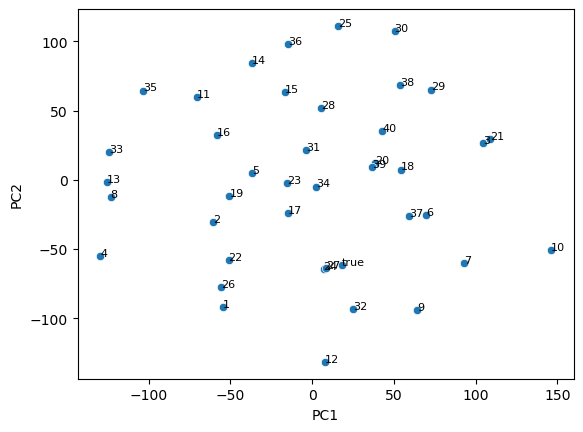

In [14]:
PCs = [1, 2]

fig, ax = plt.subplots()
sns.scatterplot(x=transformed_jk_sfss[:,PCs[0]], y=transformed_jk_sfss[:,PCs[1]], ax=ax)
plt.text(transformed_jk_sfss[0,PCs[0]], transformed_jk_sfss[0,PCs[1]], 
         "true", fontsize=8)
for i in range(1, 40+1):
    plt.text(transformed_jk_sfss[i,PCs[0]], transformed_jk_sfss[i,PCs[1]], 
             str(i), fontsize=8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()